# CFSB Coding Challenge
## Question 1a.
### There's only one in the 3 digits range [510, 511, 512, 513]

In [1]:
wholeStack=[]  #This has all the numbers which satisfy the condition
currentStack=[]  #This is the current stack which satisfy the condition
Sum=0
for i in range(100,1000):
    
    num=i
    #loop to get the sum of the digits
    while num>0: 
        remainder=num % 10
        Sum+=remainder
        num=num//10
    
    #Check if the number is a multiple of the sume of its digits
    if i%Sum==0:
        currentStack.append(i)
        if len(currentStack)==4:
            wholeStack.append(currentStack)
    else:
        currentStack=[]
    Sum=0
wholeStack

[[510, 511, 512, 513]]

##  1b.
### Are there 17 consecutive 3-digit integers, such that they cannot be divided by the sum of their digits? 18?
### There are 17 consecutive 3-digit integers.  


In [2]:
wholeStack=[]  #This has all the numbers which satisfy the condition
currentStack=[]  #This is the current stack which satisfy the condition
Sum=0
for i in range(100,1000):
    
    num=i
    #loop to get the sum of the digits
    while num>0: 
        remainder=num % 10
        Sum+=remainder
        num=num//10
    
    #Check if the number is a multiple of the sume of its digits
    if i%Sum==0:
        currentStack.append(i)
        if len(currentStack)==2:
            wholeStack.append(currentStack)
    else:
        currentStack=[]
    Sum=0
len(wholeStack)

17

##  1c.
###  By using Memoization and Dynamic Programming. Store previously calculated value set into a data structure.


## a. Perform a quick exploratory analysis with summary statistics and plots.
## b. Implement an LDA classification model of {g ~ x.1 + x.2 + … + x.256} for the “g” response
using cross validation or other sampling methods if deemed necessary.
i. Print model performance statistics, generating plots as necessary and write a
quick narrative summarizing results.
ii. What are some considerations that should be made before implementing LDA?
Does your exploratory analysis suggest that this is a good modeling technique to
use for this data?

## 2a. Performing a quick exploratory analysis with summary statistics and plots.
### This Scatter plot finds the correlation between the 5 Responses and the Predictor Features.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import re

from sklearn.datasets import load_wine
np.set_printoptions(precision=4)
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

fig=plt.figure(figsize=(15,12))


df = pd.read_csv('phoneme.data')
#df2 = pd.read_csv('./Files/phoneme.info.txt')
df
predictFeature = [col for col in df if col.startswith('x.')]
# predictorFeature = df.columns.str.startswith("x.")
#type(df)
predictFeature
df[predictFeature]
df['g']

#plt.plot(df['g'], df[predictFeature],'s')
plt.plot(df['g'], df[predictFeature],'o')
#plt.legend(["Predictor Features","Response",'blue'])
plt.xlabel('Response')
plt.ylabel('Predictor Feature')

plt.show()

y = pd.DataFrame(df['g'])



<Figure size 1500x1200 with 1 Axes>

In [ ]:
#df[predictFeature].info()
#df
#df.plot(x='g',y=predictFeature,kind='bar')
df.plot(x="g", y=predictFeature, kind='bar')
plt.show()

## This Scatter plot finds the correlation between the 5 Responses and the Predictor Features.

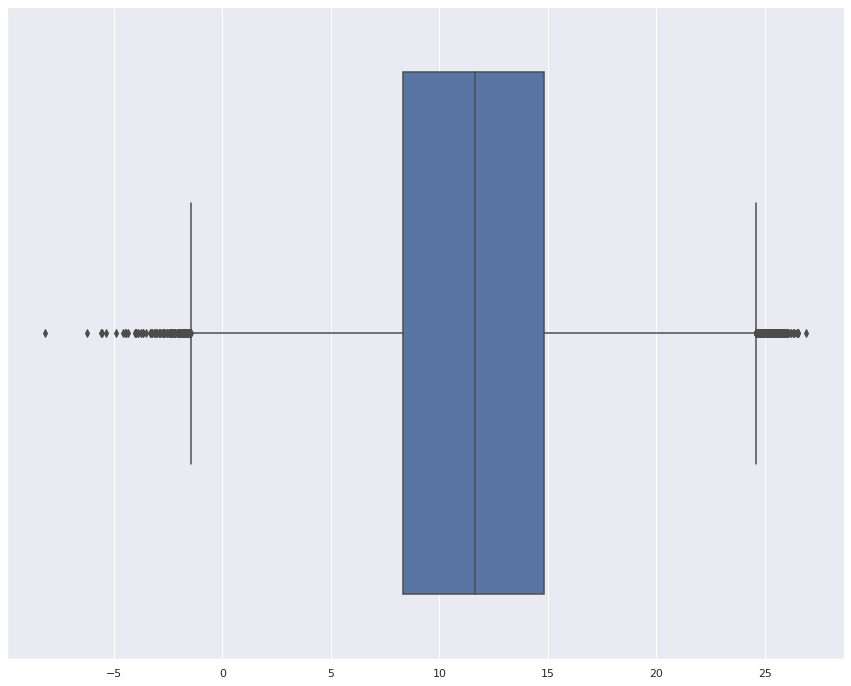

In [7]:
fig=plt.figure(figsize=(15,12))
sns.boxplot(x=df[predictFeature])

## 2b. LDA model

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(df[predictFeature],df['g'])
le = LabelEncoder()
y = le.fit_transform(df['g'])
lda.explained_variance_ratio_
#df[predictFeature]

array([0.5968, 0.2763, 0.1118, 0.0151])

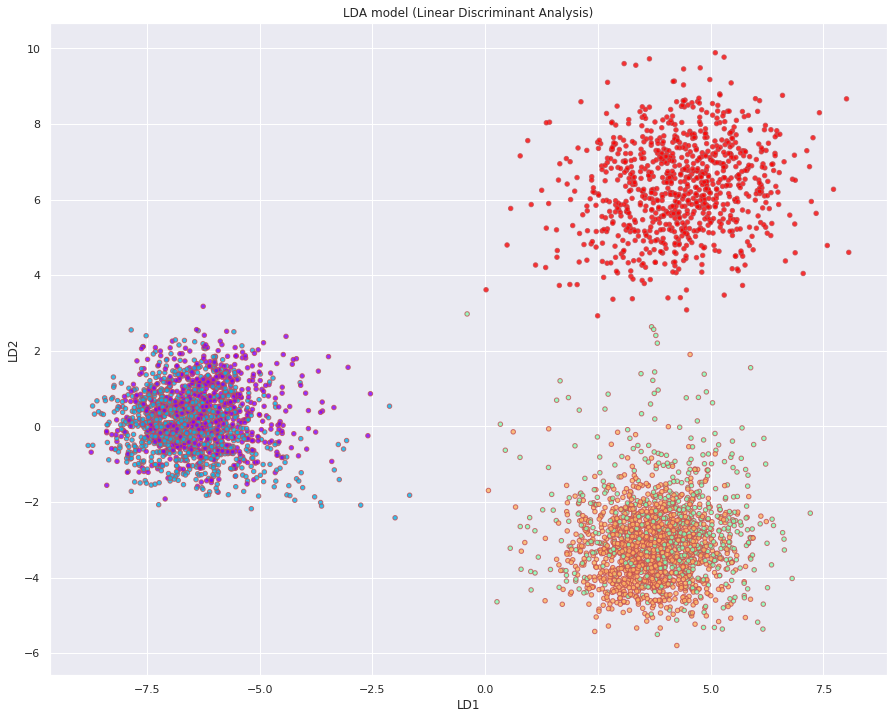

In [43]:
fig=plt.figure(figsize=(15,12))
plt.xlabel('LD1')
plt.ylabel('LD2')
label_dict = {1: 'sh', 2: 'iy', 3:'dcl', 4:'aa',5:'ao'}
#label=[i for i in range(1,6)]
plt.title('LDA model (Linear Discriminant Analysis)')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    s=20,
    c=y,
    cmap='rainbow',
    alpha=0.8,
    edgecolors='r',
    label=label_dict[1]
)
